In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

path = "/content/drive/MyDrive/cowproject2/animal_birth/dataset_animal.xlsx"  # change if needed
df = pd.read_excel(path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Cow_ID,Age_Months,Parity,Body_Temp_C,Milk_Yield_kg,Weight_kg,Pregnancy_Duration_days
0,1,58,1,37.5,19.1,417.0,277
1,2,24,1,38.4,15.5,378.1,244
2,3,50,1,38.3,25.7,560.4,256
3,4,32,4,38.4,27.1,351.9,281
4,5,28,4,38.0,17.3,637.2,251


In [ ]:
import numpy as np

# Days until birth
df["Days_to_birth"] = 280 - df["Pregnancy_Duration_days"]

# Birth in 2 days → classification
df["Birth_in_next_2_days"] = (df["Days_to_birth"] <= 2).astype(int)

df.head()


,Cow_ID,Age_Months,Parity,Body_Temp_C,Milk_Yield_kg,Weight_kg,Pregnancy_Duration_days,Days_to_birth,Birth_in_next_2_days
0,1,58,1,37.5,19.1,417.0,277,3,0
1,2,24,1,38.4,15.5,378.1,244,36,0
2,3,50,1,38.3,25.7,560.4,256,24,0
3,4,32,4,38.4,27.1,351.9,281,-1,1
4,5,28,4,38.0,17.3,637.2,251,29,0


In [ ]:
df.describe()


,Cow_ID,Age_Months,Parity,Body_Temp_C,Milk_Yield_kg,Weight_kg,Pregnancy_Duration_days,Days_to_birth,Birth_in_next_2_days
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,68.955800,3.014000,38.300120,20.16230,451.46548,244.459600,35.540400,0.135600
std,1443.520003,29.045271,1.415275,0.305324,5.75231,79.16826,26.068845,26.068845,0.342398
min,1.000000,20.000000,1.000000,37.500000,8.00000,300.00000,200.000000,-9.000000,0.000000
25%,1250.750000,43.000000,2.000000,38.100000,16.20000,395.40000,222.000000,13.000000,0.000000
50%,2500.500000,69.000000,3.000000,38.300000,20.10000,450.20000,245.000000,35.000000,0.000000
75%,3750.250000,94.000000,4.000000,38.500000,24.00000,505.75000,267.000000,58.000000,0.000000
max,5000.000000,119.000000,5.000000,39.500000,39.90000,700.00000,289.000000,80.000000,1.000000


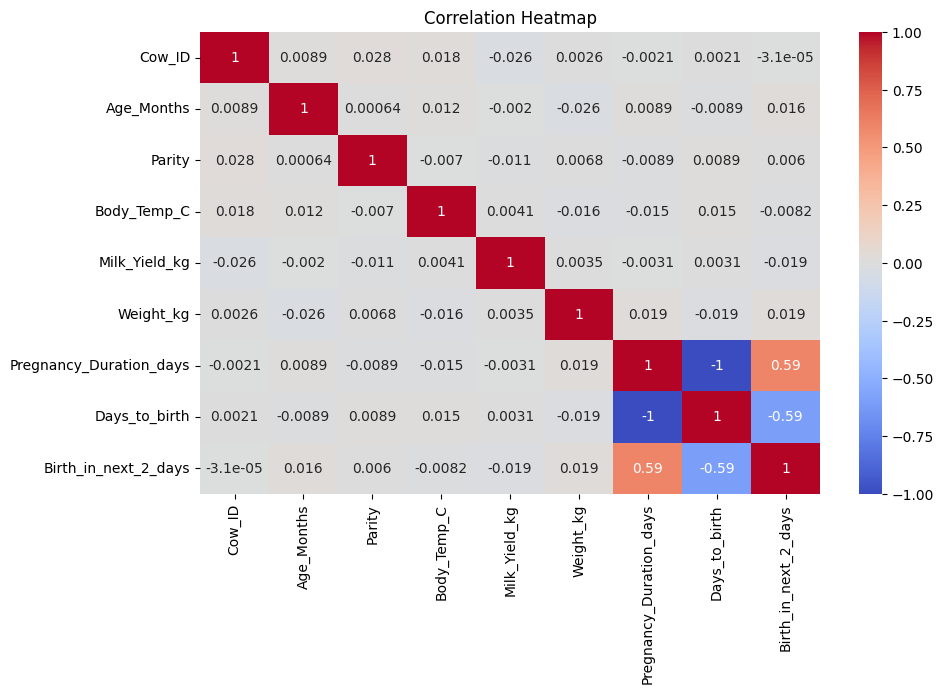

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


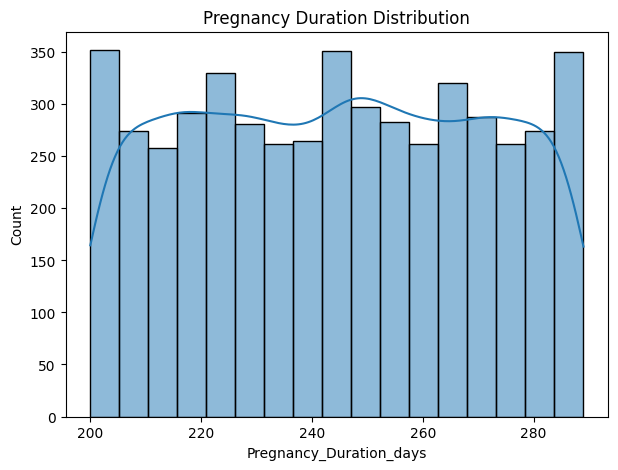

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df["Pregnancy_Duration_days"], kde=True)
plt.title("Pregnancy Duration Distribution")
plt.show()


In [ ]:
features = df[["Age_Months", "Parity", "Body_Temp_C", "Milk_Yield_kg", "Weight_kg"]]

X = features
y_class = df["Birth_in_next_2_days"]
y_reg = df["Days_to_birth"]

from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_c, y_train_c)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_c = clf.predict(X_test_c)

print("Classification Report:")
print(classification_report(y_test_c, y_pred_c))

print("Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       872
           1       0.33      0.01      0.02       128

    accuracy                           0.87      1000
   macro avg       0.60      0.50      0.47      1000
weighted avg       0.80      0.87      0.81      1000

Confusion Matrix:
[[870   2]
 [127   1]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=200, random_state=42)
reg.fit(X_train_r, y_train_r)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_r = reg.predict(X_test_r)

print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))


MAE: 23.32704
RMSE: 27.241216112721546


In [ ]:
def predict_cow(age, parity, temp, milk, weight):
    data = pd.DataFrame([[age, parity, temp, milk, weight]],
                        columns=X.columns)

    birth_next2 = clf.predict(data)[0]
    days_to_birth = reg.predict(data)[0]

    return {
        "Will Birth in Next 2 Days?": "YES" if birth_next2 == 1 else "NO",
        "Estimated Days to Birth": round(days_to_birth, 2)
    }


# Example:
predict_cow(40, 2, 38.4, 20.5, 480)



{'Will Birth in Next 2 Days?': 'NO',
 'Estimated Days to Birth': np.float64(41.49)}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save models
import joblib

joblib.dump(clf, '/content/drive/MyDrive/cowproject2/animal_birth/clf.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/cowproject2/animal_birth/clf.pkl']